<a href="https://colab.research.google.com/github/Dhairya-Arora01/predictiveMaintenance/blob/main/Predictive_maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [582]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [583]:
import zipfile
zipPath = 'drive/MyDrive/CMAPSSData.zip'

with zipfile.ZipFile(zipPath, 'r') as zipRef:
  zipRef.extractall()

In [584]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## Loading the data into a structure

In [585]:
settings = ['setting_{}'.format(i) for i in range(1,4)]
sensors = ['sensor_{}'.format(i) for i in range(1,22)]
col_names = ["unit_no", "cycles"] + settings + sensors

In [586]:
train= pd.read_csv('train_FD001.txt', sep='\s+', header=None, names=col_names)

### Calculating RUL for train_data

In [587]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unit_no    20631 non-null  int64  
 1   cycles     20631 non-null  int64  
 2   setting_1  20631 non-null  float64
 3   setting_2  20631 non-null  float64
 4   setting_3  20631 non-null  float64
 5   sensor_1   20631 non-null  float64
 6   sensor_2   20631 non-null  float64
 7   sensor_3   20631 non-null  float64
 8   sensor_4   20631 non-null  float64
 9   sensor_5   20631 non-null  float64
 10  sensor_6   20631 non-null  float64
 11  sensor_7   20631 non-null  float64
 12  sensor_8   20631 non-null  float64
 13  sensor_9   20631 non-null  float64
 14  sensor_10  20631 non-null  float64
 15  sensor_11  20631 non-null  float64
 16  sensor_12  20631 non-null  float64
 17  sensor_13  20631 non-null  float64
 18  sensor_14  20631 non-null  float64
 19  sensor_15  20631 non-null  float64
 20  sensor

Nice! All dtype for all the columns is either int or float

In [588]:
last_cycle = train.groupby('unit_no')['cycles'].transform('max')
# transform applies a function to each group separately, and returns a new Series or DataFrame with the same shape as the original input.
train['RUL'] = last_cycle - train['cycles']

In [589]:
train.head()

,unit_no,cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [590]:
train

,unit_no,cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


##EDA

In [591]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit_no,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


- Need to remove those features which remains constant i.e. 0 standard deviation : setting_3, sensor_1, sensor_10, sensor_18, sensor_19.

- Also need to scale the features.

### RUL distribution

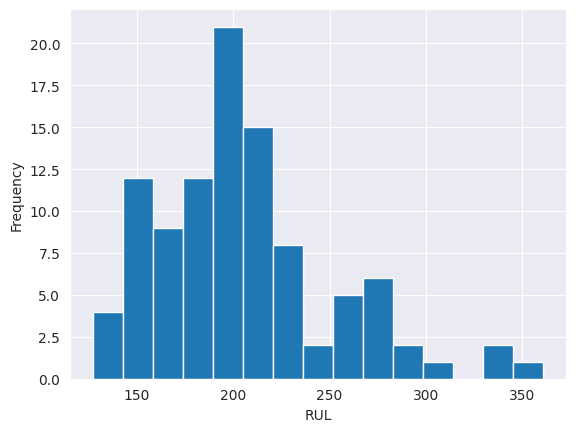

In [592]:
plt.hist(train[["unit_no", "RUL"]].groupby("unit_no").max(), bins=15)
plt.xlabel("RUL")
plt.ylabel("Frequency")
plt.show()

The distribution is right-skewed.

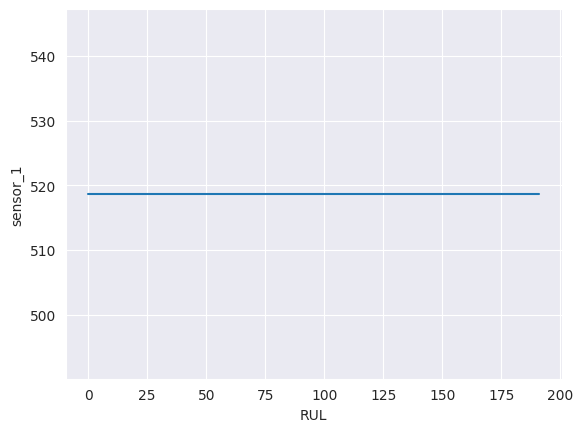

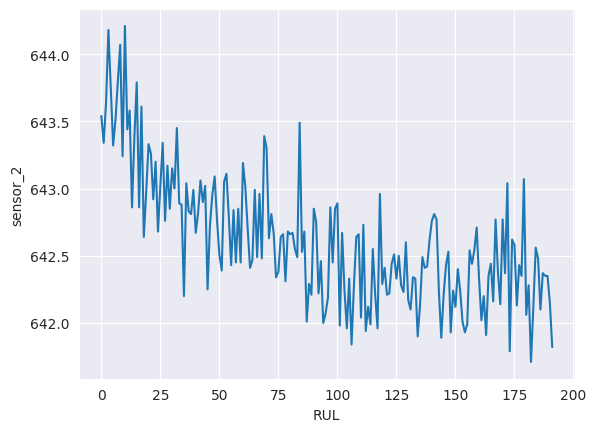

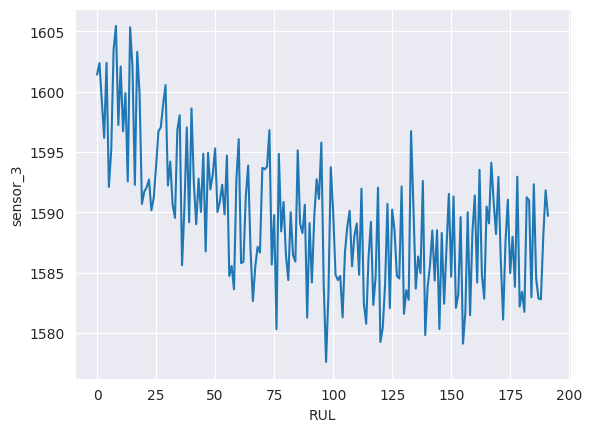

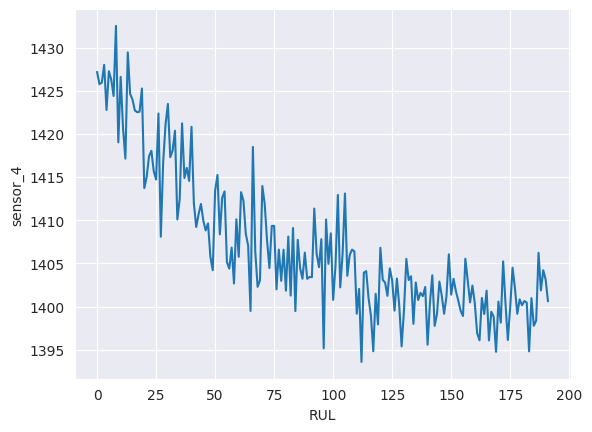

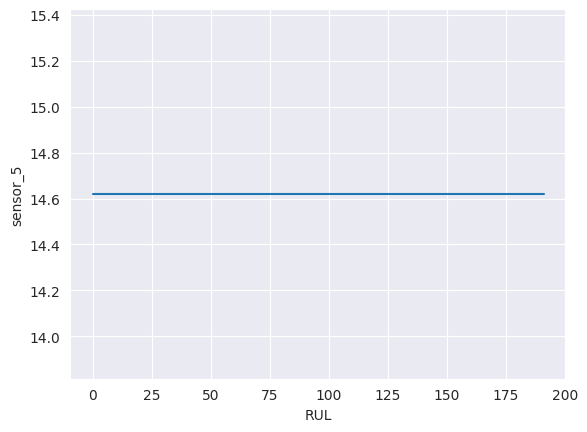

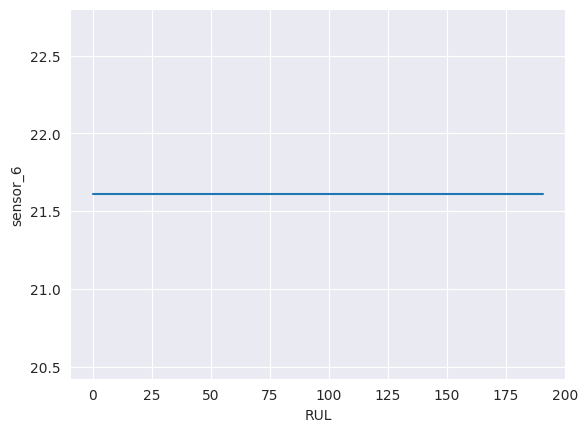

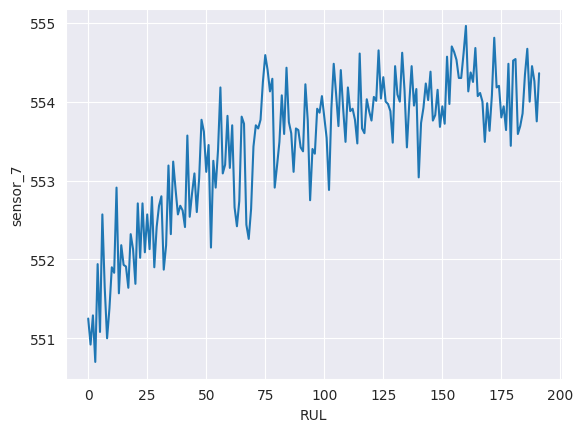

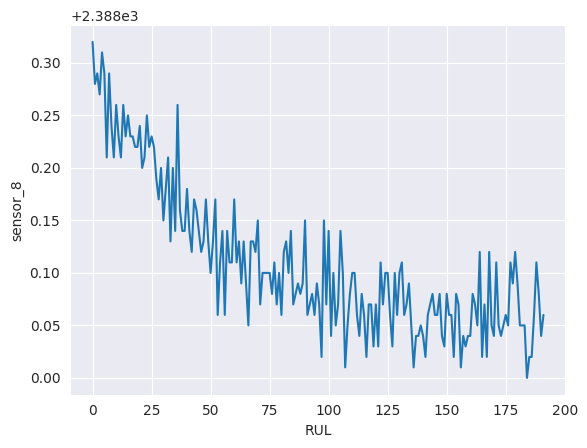

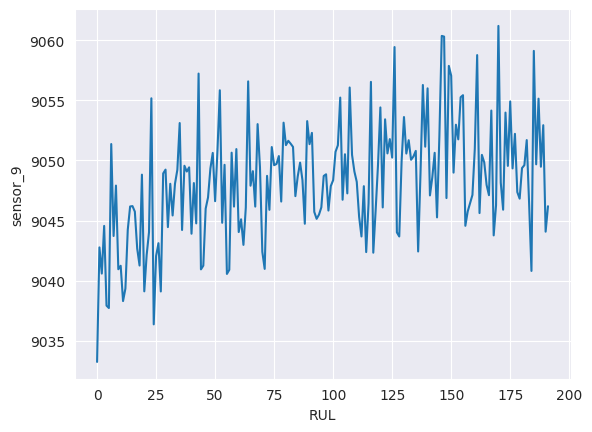

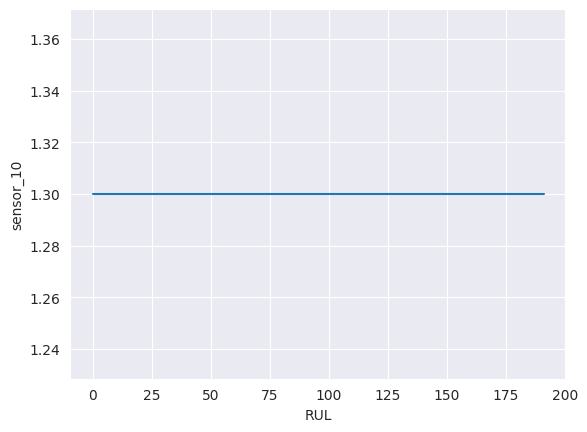

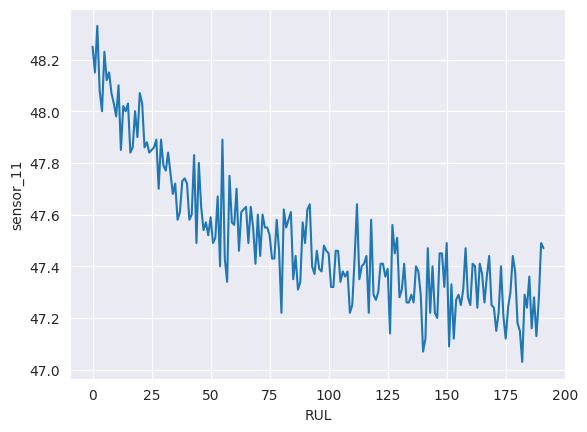

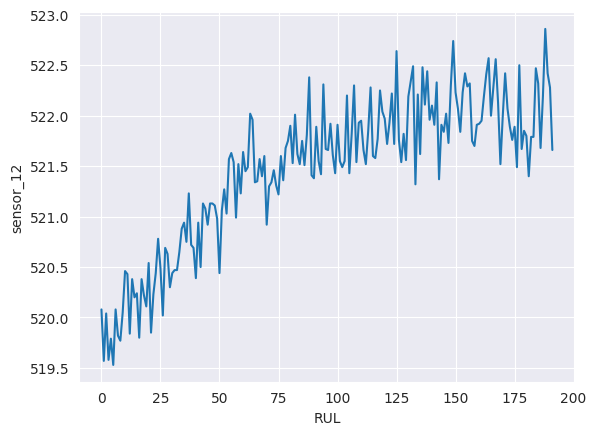

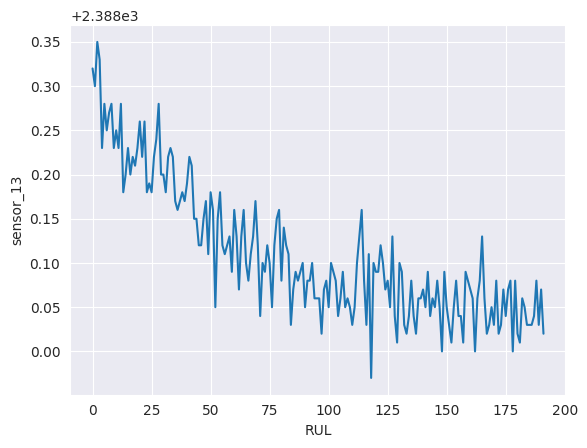

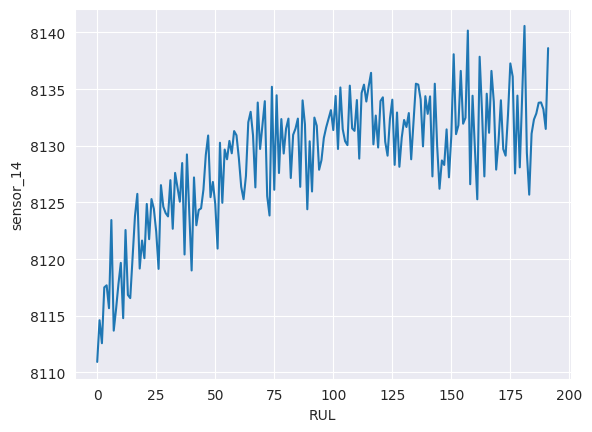

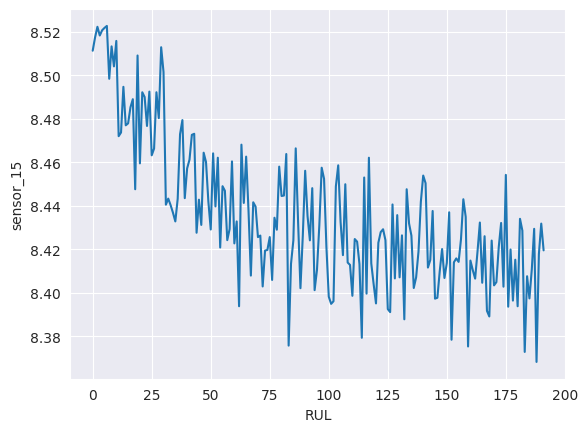

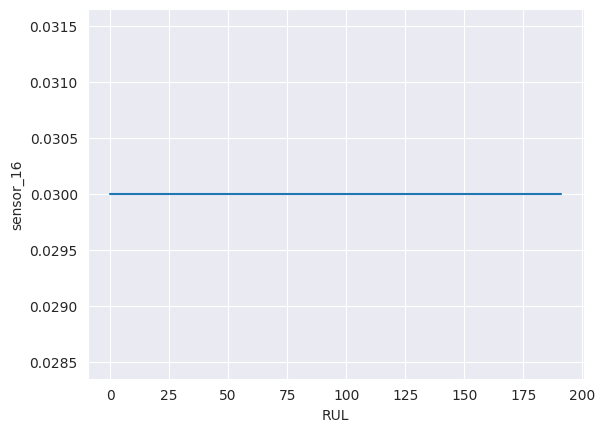

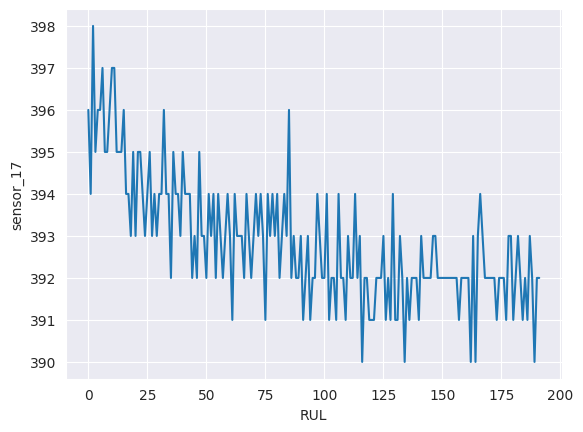

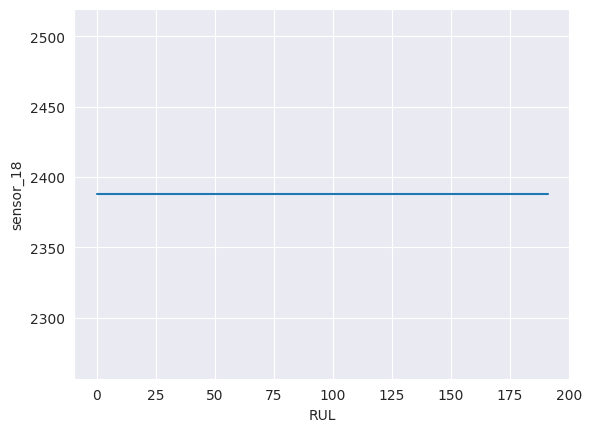

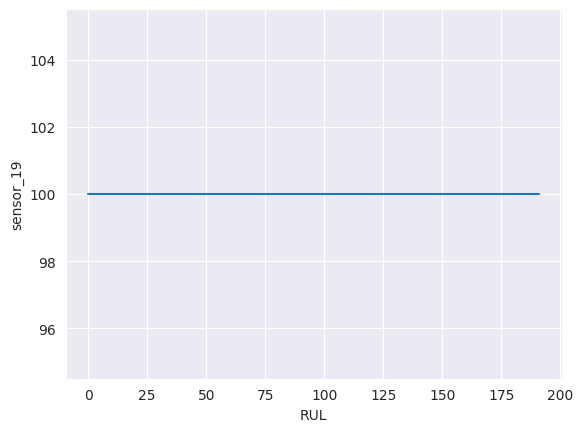

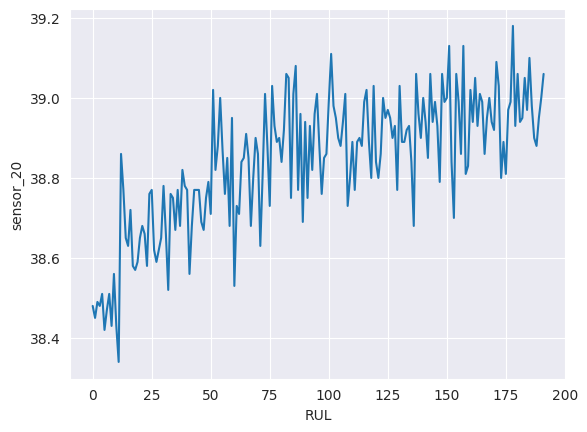

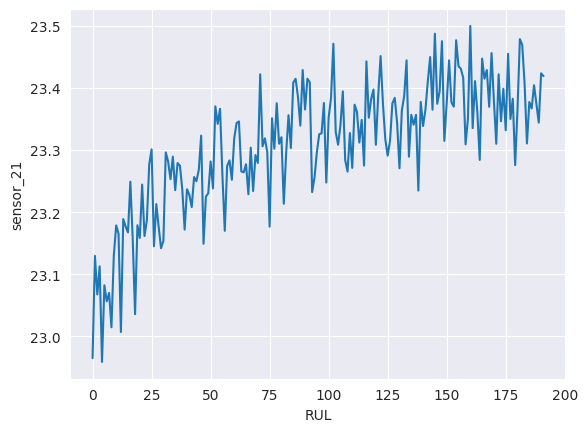

In [593]:
for col in sensors:
  plt.plot(train['RUL'][train['unit_no'] == 1], train[col][train['unit_no'] == 1])
  plt.xlabel('RUL')
  plt.ylabel(col)
  plt.show()

The data is quite noisy, we need to smoothen it out with rolling average.

In [594]:
smoothed_data = train.groupby('unit_no')[sensors].rolling(window=10, min_periods=1).mean()
train[sensors] = smoothed_data.reset_index(level=0, drop=True)

In [595]:
train

,unit_no,cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.820000,1589.700000,1400.600000,14.62,...,2388.020,8138.620000,8.419500,0.03,392.000000,2388.0,100.0,39.060000,23.419000,191
1,1,2,0.0019,-0.0003,100.0,518.67,641.985000,1590.760000,1401.870000,14.62,...,2388.045,8135.055000,8.425650,0.03,392.000000,2388.0,100.0,39.030000,23.421300,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.106667,1589.836667,1402.646667,14.62,...,2388.040,8134.446667,8.423033,0.03,391.333333,2388.0,100.0,39.003333,23.395600,189
3,1,4,0.0007,0.0000,100.0,518.67,642.167500,1588.075000,1402.452500,14.62,...,2388.050,8134.292500,8.409325,0.03,391.500000,2388.0,100.0,38.972500,23.390175,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.208000,1587.030000,1403.206000,14.62,...,2388.048,8134.194000,8.413340,0.03,391.800000,2388.0,100.0,38.958000,23.393020,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.456000,1599.625000,1426.079000,14.62,...,2388.237,8141.170000,8.510310,0.03,396.000000,2388.0,100.0,38.453000,23.092540,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.447000,1600.379000,1427.288000,14.62,...,2388.237,8140.771000,8.510830,0.03,395.900000,2388.0,100.0,38.416000,23.085400,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.470000,1600.848000,1427.449000,14.62,...,2388.240,8140.882000,8.519150,0.03,396.200000,2388.0,100.0,38.424000,23.073210,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.424000,1601.389000,1427.787000,14.62,...,2388.239,8140.833000,8.524340,0.03,396.000000,2388.0,100.0,38.388000,23.073700,1


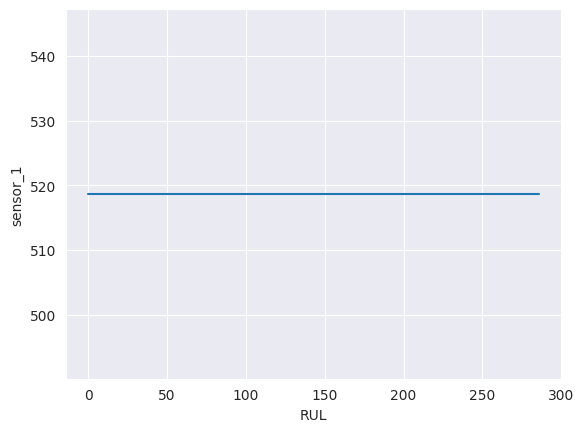

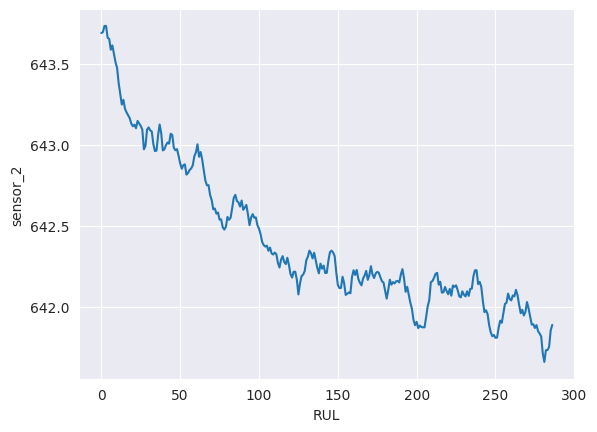

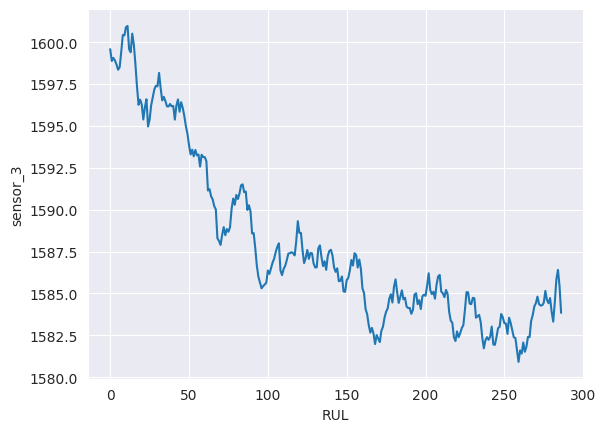

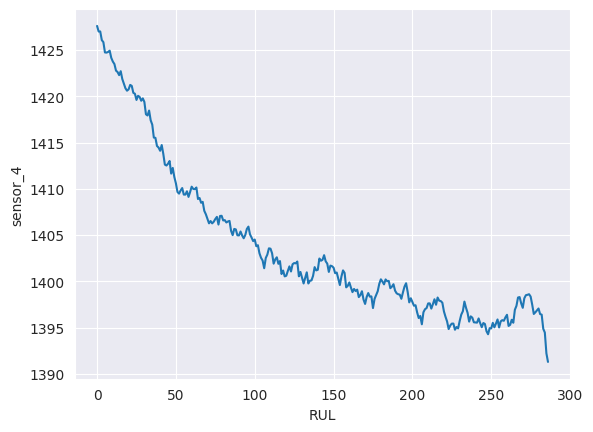

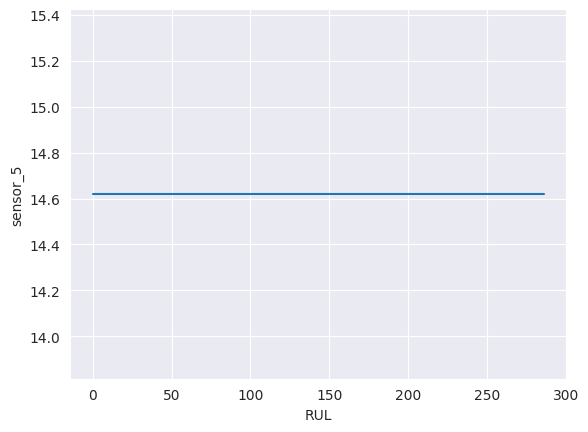

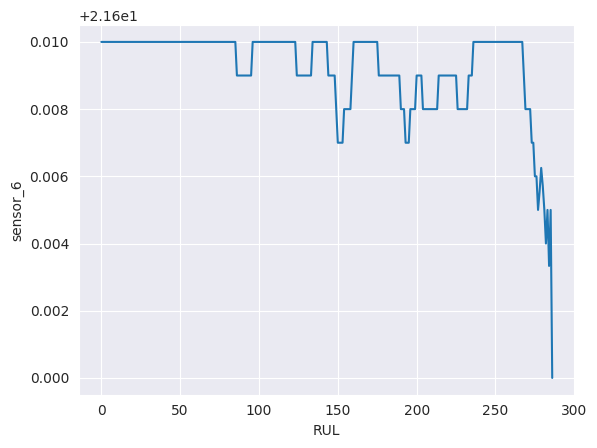

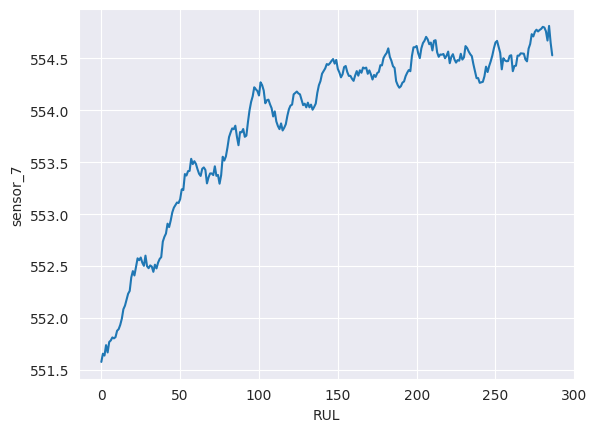

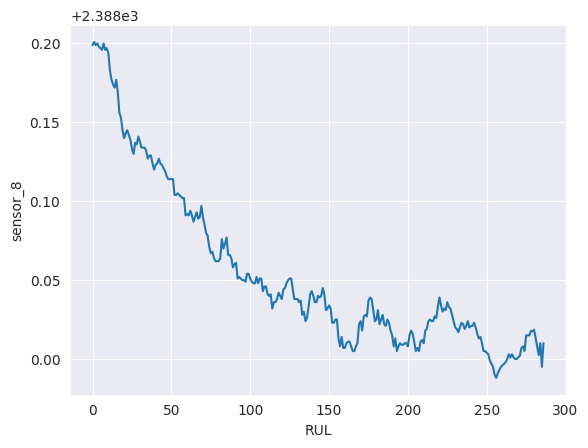

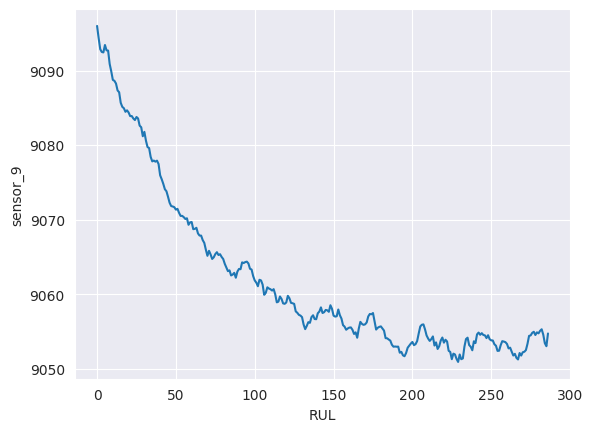

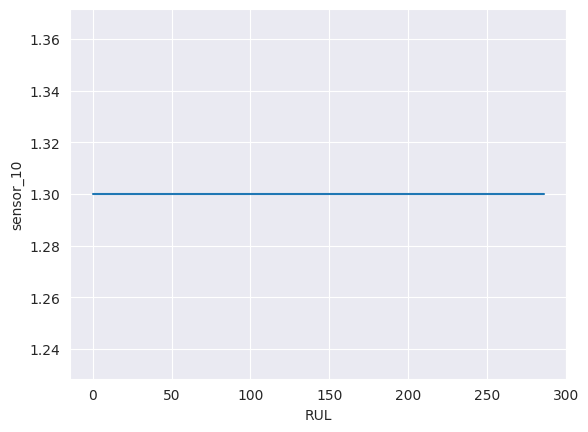

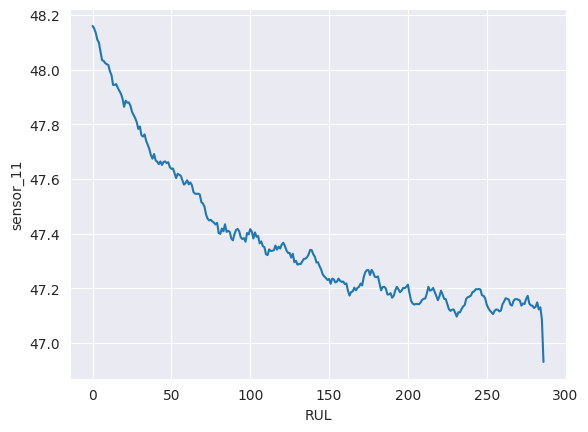

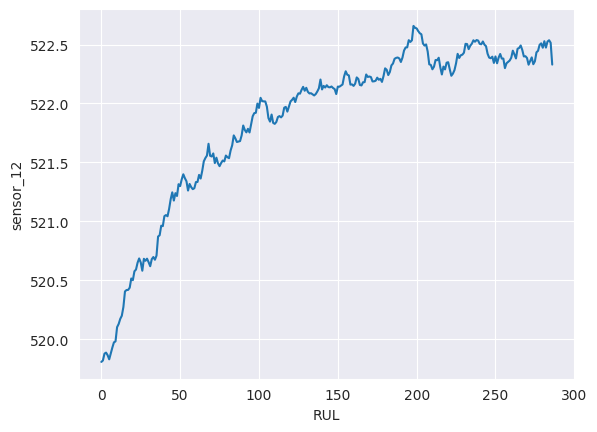

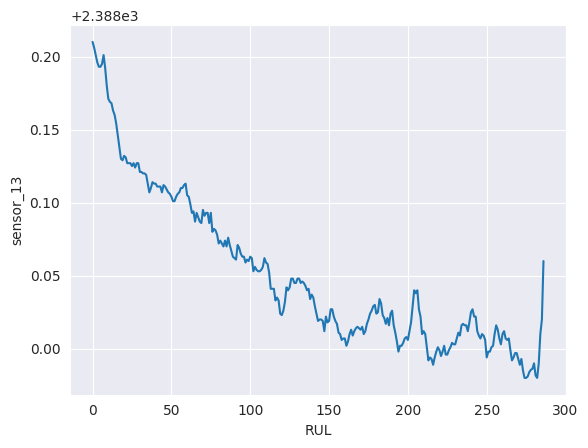

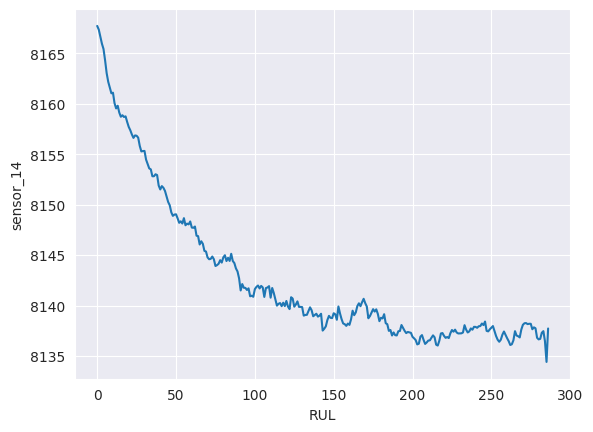

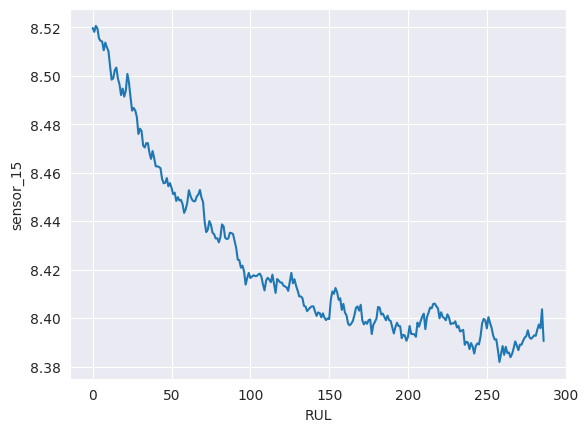

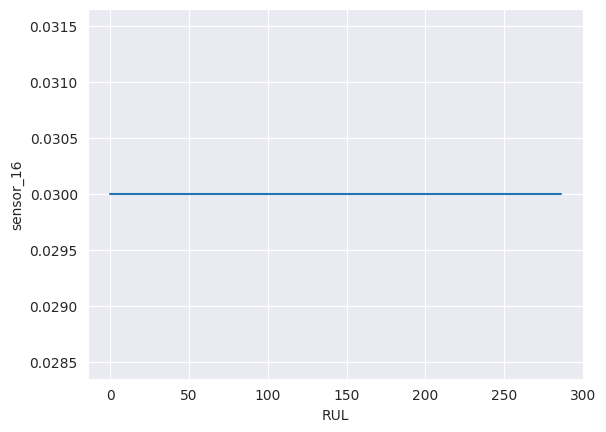

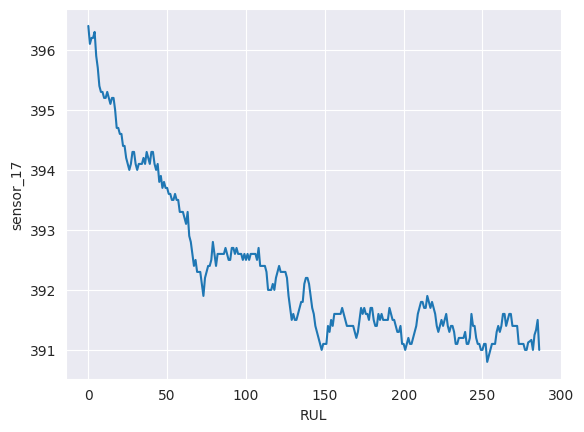

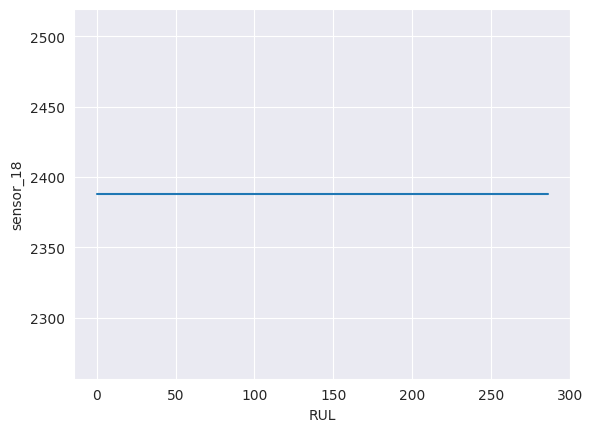

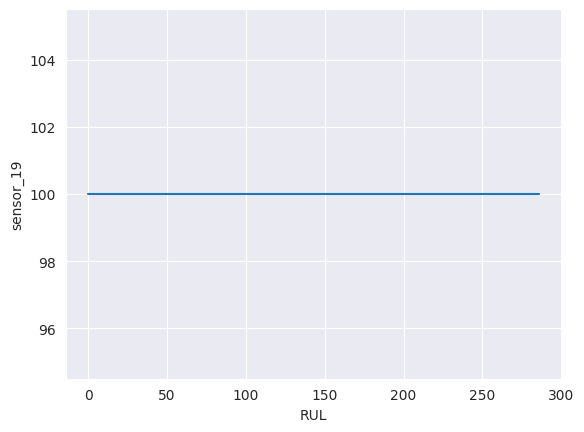

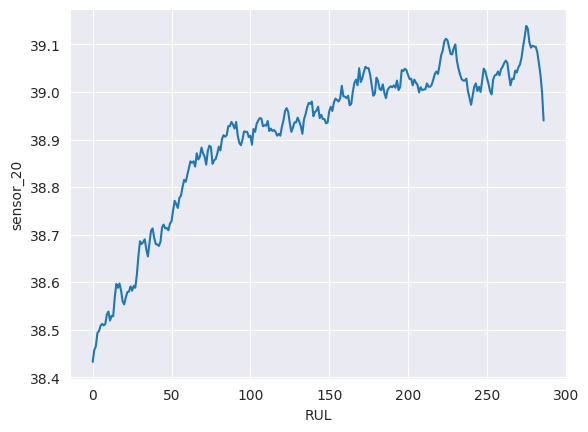

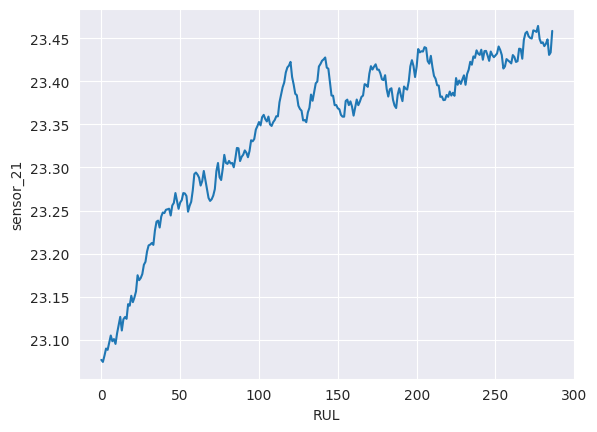

In [596]:
for col in sensors:
  plt.plot(train['RUL'][train['unit_no'] == 2], train[col][train['unit_no'] == 2])
  plt.xlabel('RUL')
  plt.ylabel(col)
  plt.show()

## Baseline Model

In [597]:
train = train.drop(columns = ['setting_3', 'sensor_1', 'sensor_10', 'sensor_18', 'sensor_19'])

In [598]:
y = train['RUL']
X = train.drop(columns=['RUL'])

In [599]:
print(X.shape, y.shape)

(20631, 21) (20631,)


In [600]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=28)

In [601]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [602]:
def evaluate_model(X, y, model):
  r2 = model.score(X, y)
  rmse = mean_squared_error(y, model.predict(X))**0.5
  print("RMSE:", rmse, "R2:", r2)

In [603]:
def evaluate_model(y_true, y_pred):
  rmse = mean_squared_error(y_true, y_pred)**0.5
  r2 = r2_score(y_true, y_pred)
  print("RMSE:", rmse, "R2:", r2)

In [604]:
evaluate_model(y_train, lr.predict(X_train))
evaluate_model(y_test, lr.predict(X_test))

RMSE: 39.45783979914462 R2: 0.6717615408256115
RMSE: 39.904304758415044 R2: 0.6644869257543162


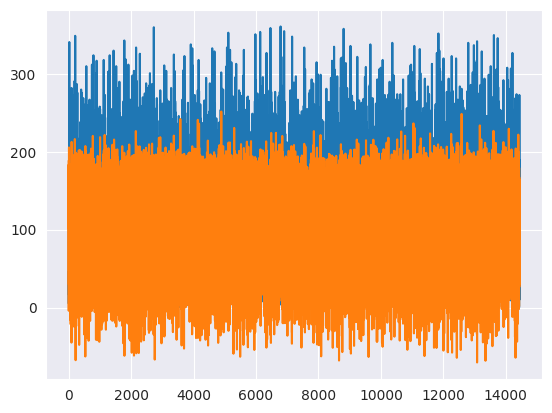

In [605]:
plt.plot([i for i in range(y_train.shape[0])], y_train)
plt.plot([i for i in range(y_train.shape[0])], lr.predict(X_train))
plt.show()

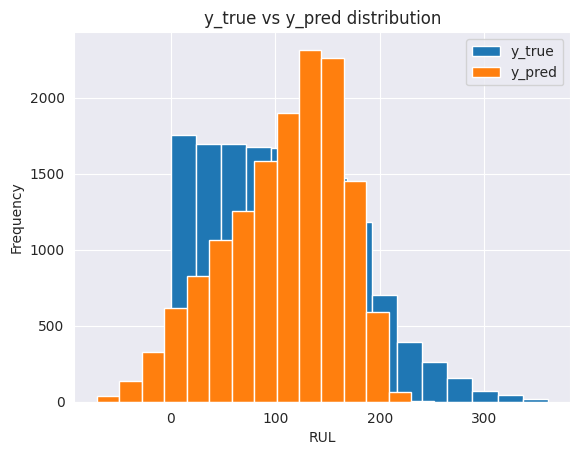

In [606]:
plt.hist(y_train, bins=15, label='y_true')
plt.hist(lr.predict(X_train), bins=15, label='y_pred')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.legend()
plt.title('y_true vs y_pred distribution')
plt.show()

In [607]:
y_train.describe()

count    14441.000000
mean       107.467973
std         68.873731
min          0.000000
25%         51.000000
50%        102.000000
75%        155.000000
max        361.000000
Name: RUL, dtype: float64

In [608]:
print(np.mean(lr.predict(X_train)))
print(np.var(lr.predict(X_train))**0.5)
print(np.max(lr.predict(X_train)))
print(np.min(lr.predict(X_train)))

107.4679731320562
56.44768566903409
251.7558704787516
-70.6068421669188


Problems
- Our model is predicting negative RUL so we must clip it to 0.
- We might need a complex model because it is not able to predict the extremeties.

In [609]:
# clipping negative RULs to 0
y_train_pred = lr.predict(X_train)
y_train_pred[np.where(y_train_pred < 0)] = 0
y_test_pred = lr.predict(X_test)
y_test_pred[np.where(y_test_pred < 0)] = 0

In [610]:
print("Train data")
evaluate_model(y_train, y_train_pred)
print("Test data")
evaluate_model(y_test, y_test_pred)

Train data
RMSE: 38.87666608188532 R2: 0.681359566976975
Test data
RMSE: 39.249688518174416 R2: 0.6754045855270575


clipping decreased the err by a little.

In [611]:
def hist_compare(y_true, y_pred):
  plt.hist(y_true, bins=15, label='y_true')
  plt.hist(y_pred, bins=15, label='y_pred')
  plt.xlabel('RUL')
  plt.ylabel('Frequency')
  plt.legend()
  plt.title('y_true vs y_pred distribution')
  plt.show()

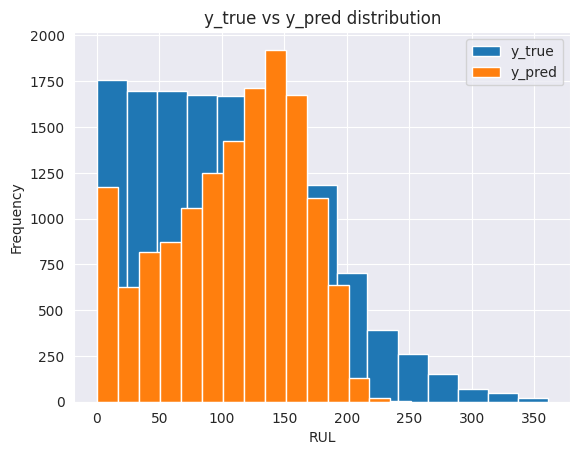

In [612]:
hist_compare(y_train, y_train_pred)

Thus we need a more complex model.

In [613]:
def clip_result_0(y_pred):
  y_pred[np.where(y_pred < 0)] = 0
  return y_pred

## Polynomial Regression

In [614]:
poly = PolynomialFeatures(degree = 3)
X_train_poly = poly.fit_transform(X_train)

In [615]:
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

LinearRegression()

In [616]:
y_train_predict = pr.predict(X_train_poly)
y_train_predict = clip_result_0(y_train_predict)
X_test_poly = poly.fit_transform(X_test)
y_test_predict = pr.predict(X_test_poly)
y_test_predict = clip_result_0(y_test_predict)

In [617]:
print("Train data")
evaluate_model(y_train, y_train_predict)
print("Test data")
evaluate_model(y_test, y_test_predict)

Train data
RMSE: 30.007721198960354 R2: 0.8101594920968688
Test data
RMSE: 36.46293709610543 R2: 0.7198612105641072


Decrease in error and increase in R2 score

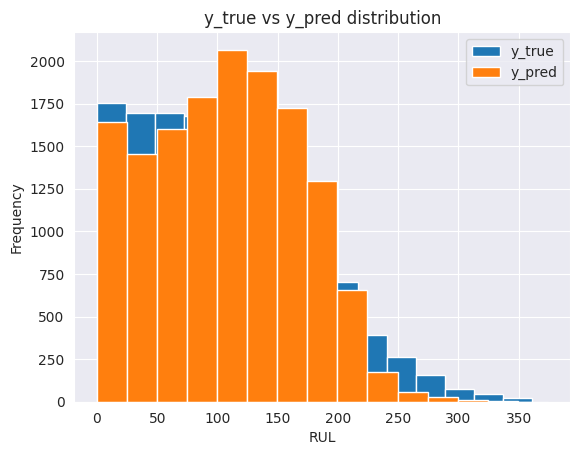

In [618]:
hist_compare(y_train, y_train_predict)

## SVM

In [619]:
svm = SVR(kernel='poly')
svm.fit(X_train, y_train)

SVR(kernel='poly')

In [620]:
y_train_predict = svm.predict(X_train)
y_train_predict = clip_result_0(y_train_predict)
y_test_predict = svm.predict(X_test)
y_test_predict = clip_result_0(y_test_predict)

In [621]:
print("Train data")
evaluate_model(y_train, y_train_predict)
print("Test data")
evaluate_model(y_test, y_test_predict)

Train data
RMSE: 67.6765751368669 R2: 0.03439479098754428
Test data
RMSE: 67.81636383082967 R2: 0.03096614234998618


Poor performance shown by SVM

## Decision Tree

In [622]:
dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [623]:
y_train_predict = dtree.predict(X_train)
y_train_predict = clip_result_0(y_train_predict)
y_test_predict = dtree.predict(X_test)
y_test_predict = clip_result_0(y_test_predict)

In [624]:
print("Train data")
evaluate_model(y_train, y_train_predict)
print("Test data")
evaluate_model(y_test, y_test_predict)

Train data
RMSE: 0.0 R2: 1.0
Test data
RMSE: 14.8133077750204 R2: 0.9537646612798435


We are definitely overfitting but this looks promising that dtree after hpt would yield better results.

### HPT for Decision Tree

In [625]:
# param_grid = {
#     'criterion': ['squared_error', 'friedman_mse'],
#     'max_depth': [12, 13, 15, 18],
#     'min_samples_split': [6, 8, 10, 12, 15, 18]
# }

In [626]:
# grid_cv = GridSearchCV(DecisionTreeRegressor(random_state=28), param_grid = param_grid, scoring='neg_mean_squared_error', cv=5 ,n_jobs=-1)
# grid_cv.fit(X_train, y_train)

In [627]:
# grid_cv.best_estimator_

In [628]:
# grid_cv.best_score_

In [629]:
best_dtree = DecisionTreeRegressor(max_depth=13, min_samples_split=15, random_state=28)
best_dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=13, min_samples_split=15, random_state=28)

In [630]:
y_train_predict = best_dtree.predict(X_train)
y_train_predict = clip_result_0(y_train_predict)
y_test_predict = best_dtree.predict(X_test)
y_test_predict = clip_result_0(y_test_predict)

In [631]:
print("Train data")
evaluate_model(y_train, y_train_predict)
print("Test data")
evaluate_model(y_test, y_test_predict)

Train data
RMSE: 8.778553393425112 R2: 0.9837531651902309
Test data
RMSE: 16.122482135344114 R2: 0.9452311326064442


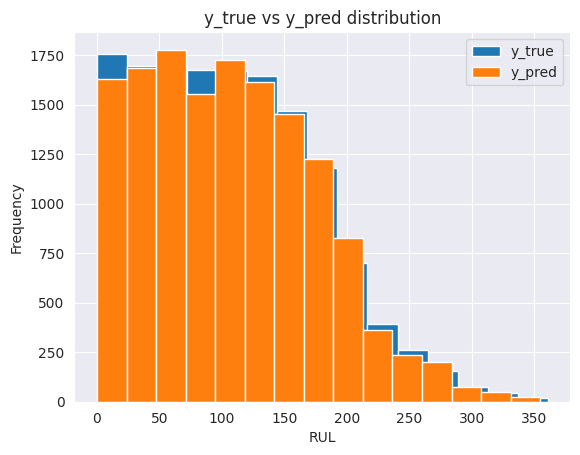

In [632]:
hist_compare(y_train, y_train_predict)

## Random Forest

In [633]:
rfr = RandomForestRegressor(random_state=28)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=28)

In [634]:
y_train_predict = rfr.predict(X_train)
y_train_predict = clip_result_0(y_train_predict)
y_test_predict = rfr.predict(X_test)
y_test_predict = clip_result_0(y_test_predict)

In [635]:
print("Train data")
evaluate_model(y_train, y_train_predict)
print("Test data")
evaluate_model(y_test, y_test_predict)

Train data
RMSE: 3.215985627324143 R2: 0.9978195252937824
Test data
RMSE: 8.297884379143182 R2: 0.9854920947860306


### HPT for RandomForest

In [636]:
# param_grid = {
#     'n_estimators': [100, 250],
#     'max_depth': [10, 12, 15]
# }

In [637]:
# grid_cv = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
# grid_cv.fit(X_train, y_train)

In [638]:
# grid_cv.best_score_

In [639]:
# grid_cv.best_estimator_

In [640]:
best_rfr = RandomForestRegressor(max_depth=15)
best_rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=15)

In [641]:
y_train_predict = best_rfr.predict(X_train)
y_train_predict = clip_result_0(y_train_predict)
y_test_predict = best_rfr.predict(X_test)
y_test_predict = clip_result_0(y_test_predict)

In [642]:
print("Train data")
evaluate_model(y_train, y_train_predict)
print("Test data")
evaluate_model(y_test, y_test_predict)

Train data
RMSE: 4.205403792744363 R2: 0.9962714647017104
Test data
RMSE: 9.137347311291593 R2: 0.9824082025187393


## XGBoost

In [643]:
xg = XGBRegressor(random_state=28)
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=28, ...)

In [644]:
y_train_predict = xg.predict(X_train)
y_train_predict = clip_result_0(y_train_predict)
y_test_predict = xg.predict(X_test)
y_test_predict = clip_result_0(y_test_predict)

In [645]:
print("Train data")
evaluate_model(y_train, y_train_predict)
print("Test data")
evaluate_model(y_test, y_test_predict)

Train data
RMSE: 3.7458478830794633 R2: 0.9970418299979348
Test data
RMSE: 6.927450664125425 R2: 0.9898884709439025


##HPT for XGBoost

In [646]:
# param_grid = {
#     'max_depth': [6, 8],
#     'n_estimators': [100, 200, 300]
# }

In [647]:
# grid_cv = GridSearchCV(XGBRegressor(random_state=28), scoring='neg_mean_squared_error', param_grid=param_grid, n_jobs=-1, cv=3)
# grid_cv.fit(X_train, y_train)

In [648]:
# grid_cv.best_score_

In [649]:
# grid_cv.best_estimator_

In [650]:
xgb_best = XGBRegressor(max_depth=6, n_estimators=200)
xgb_best.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [651]:
y_train_predict = xgb_best.predict(X_train)
y_train_predict = clip_result_0(y_train_predict)
y_test_predict = xgb_best.predict(X_test)
y_test_predict = clip_result_0(y_test_predict)

In [652]:
print("Train data")
evaluate_model(y_train, y_train_predict)
print("Test data")
evaluate_model(y_test, y_test_predict)

Train data
RMSE: 2.217768610544474 R2: 0.9989630559605632
Test data
RMSE: 6.489874869897191 R2: 0.9911255264815488


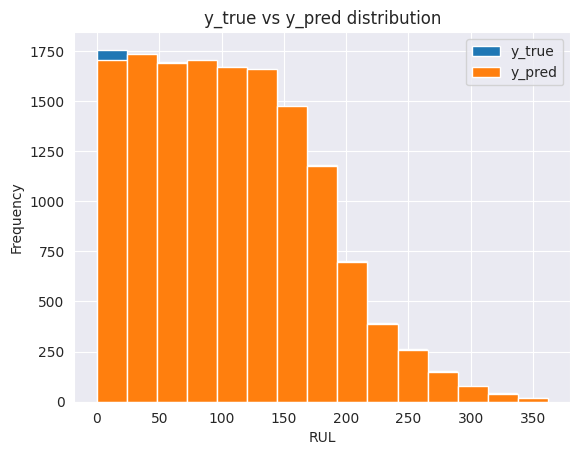

In [653]:
hist_compare(y_train, y_train_predict)